In [ ]:
# Part 1: Detecting Data Drift in AI/ML Models
# Objective: Understand data drift, how it affects machine learning models, and techniques tomonitor it.

# Task 1: Understanding Data Drift: Study a historical dataset used in training a simple linear regression model and
# compare it with recent unseen data to detect drift.

# Task 2: Monitoring Distribution Changes: Write the code to identify features that exhibit statistical distribution differences.

# Task 3: Visualizing Data Drift: Use visualization techniques to illustrate data drift.






In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

# Generate historical training data
np.random.seed(42)
X_train = 2 * np.random.rand(200, 1)
y_train = 5 + 4 * X_train + np.random.randn(200, 1)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate recent unseen data with potential drift
# (Shift the input feature distribution and noise)
X_recent = 2 * np.random.rand(200, 1) + 1  # mean shifted by +1 (drift)
y_recent = 5 + 4 * X_recent + np.random.randn(200, 1) * 1.5

# Evaluate model performance on recent data
y_pred_recent = model.predict(X_recent)
mse_recent = mean_squared_error(y_recent, y_pred_recent)
print(f"Mean Squared Error on recent data: {mse_recent:.3f}")

# KS Test for distribution drift on feature X
ks_stat, p_val = ks_2samp(X_train.flatten(), X_recent.flatten())
print(f"KS Test statistic: {ks_stat:.3f}, p-value: {p_val:.5f}")
if p_val < 0.05:
    print("Feature distribution has significantly drifted.")
else:
    print("No significant distribution drift detected.")


Mean Squared Error on recent data: 2.280
KS Test statistic: 0.535, p-value: 0.00000
Feature distribution has significantly drifted.


In [2]:
def detect_drift(original_df, recent_df, feature_cols, alpha=0.05):
    drift_report = {}
    from scipy.stats import ks_2samp
    
    for col in feature_cols:
        stat, p = ks_2samp(original_df[col], recent_df[col])
        drift_report[col] = {'ks_stat': stat, 'p_value': p, 'drifted': p < alpha}
    return drift_report

# Create DataFrames for easier handling
df_train = pd.DataFrame(X_train, columns=['feature1'])
df_recent = pd.DataFrame(X_recent, columns=['feature1'])

drift_results = detect_drift(df_train, df_recent, ['feature1'])
print(drift_results)


{'feature1': {'ks_stat': 0.535, 'p_value': 1.464559370199308e-26, 'drifted': True}}


/tmp/ipykernel_6972/936760535.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train['feature1'], label='Historical Data', shade=True)
/tmp/ipykernel_6972/936760535.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_recent['feature1'], label='Recent Data', shade=True)


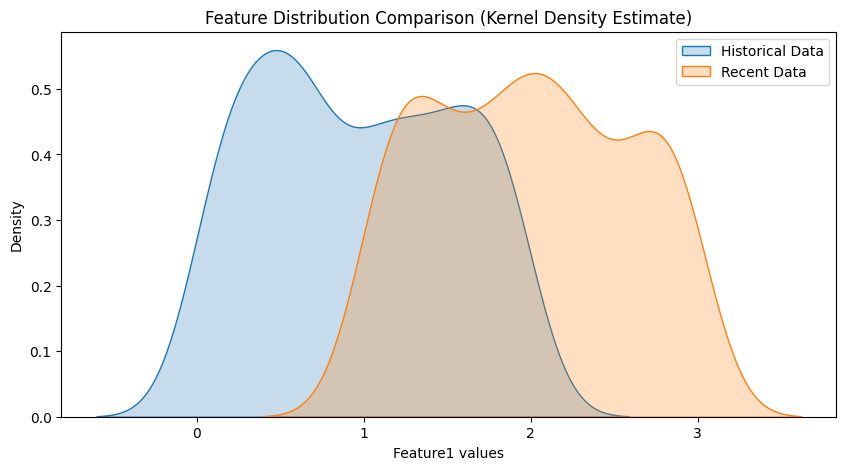

In [3]:
plt.figure(figsize=(10, 5))

sns.kdeplot(df_train['feature1'], label='Historical Data', shade=True)
sns.kdeplot(df_recent['feature1'], label='Recent Data', shade=True)

plt.title("Feature Distribution Comparison (Kernel Density Estimate)")
plt.xlabel("Feature1 values")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
# Part 2: Automating Data Quality Checks
# Objective: Use Python and data quality frameworks to automate validation.

# Task 1: Setting Up Automated Validation with Python

# Task 2: Introduction to Great Expectations: Install the great_expectations package and set up a basic project.

# Task 3: Creating Expectations with Great Expectations: Use Great Expectations to define data validation expectations for a dataset.




In [4]:
import pandas as pd

def validate_basic_quality(df):
    print("Checking for missing values:")
    print(df.isnull().sum())

    print("\nChecking for duplicates:")
    print(df.duplicated().sum())

    print("\nChecking data types:")
    print(df.dtypes)

    print("\nChecking numerical ranges (example):")
    if 'age' in df.columns:
        if not df['age'].between(0, 120).all():
            print("Warning: 'age' column has out-of-range values!")

# Example usage
data = {'id': [1, 2, 3, 4], 'age': [25, 30, -1, 40]}
df = pd.DataFrame(data)
validate_basic_quality(df)


Checking for missing values:
id     0
age    0
dtype: int64

Checking for duplicates:
0

Checking data types:
id     int64
age    int64
dtype: object

Checking numerical ranges (example):
